In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import datasets

In [2]:
import sys
sys.path.append('../commonLib')

In [3]:
import pdr_sklearn as pdk

In [4]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [5]:
# 数据分类
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#  归一化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
# 决策面绘制所需数据
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

/home/quoniam/anaconda2/envs/tensorflow/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


绘制测试数据


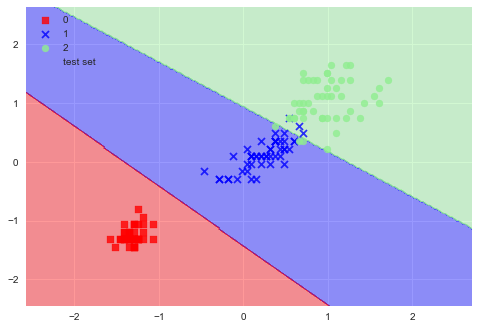

In [6]:
from sklearn.svm import  SVC
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)
pdk.plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.legend(loc='upper left')
plt.show()